In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
from google.colab import drive
drive.mount('/content/drive')

#First, I imported pandas as pd to ensure the library is uploaded so that I can use it's functions. Since I am using Google Colab, I need to mount my google drive
#so that I have access to all my files. I uploaded the data file to my Google Drive.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
file1 = pd.read_csv(f"/content/drive/MyDrive/Copy of MBTI top 1000.csv",encoding='ISO-8859-1', engine='python', index_col=0)
df = pd.DataFrame(file1)
display(df)

,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,tconst-2,averagerating,numvotes,lead_character,lead_MBTI,lead_votes,second_lead,secondlead_MBTI,secondlead_votes,relationship
tconst,,,,,,,,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,tt0111161,9.3,2934011,Andy Dufresne,INTJ,5340,Warden Norton,ESTJ,3807,Enemy
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",tt0468569,9.0,2914377,Bruce Wayne,INTJ,4893,The Joker,ENTP,5942,Enemy
tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",tt1375666,8.8,2587898,Dominick Cobb,ISTP,4034,Arthur,ISTJ,2243,Friend
tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,tt0137523,8.8,2365490,The Narrator,ISFJ,139,Tyler Durden,ENTP,2834,Rival
tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",tt0109830,8.8,2294581,Forrest Gump,ISFJ,3720,Jenny Curran,ESFP,3037,Romantic Interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0062512,movie,You Only Live Twice,You Only Live Twice,0,1967,117,"Action,Adventure,Thriller",tt0062512,6.8,118719,James Bond,ISTP,164,Ernst Stavro Blofeld,ENTJ,119,Rival
tt1315981,movie,A Single Man,A Single Man,0,2009,99,"Crime,Drama,Romance",tt1315981,7.5,118682,George Falconer,INFJ,167,Kenny Potter,ENFP,134,Romantic Interest
tt0097239,movie,Driving Miss Daisy,Driving Miss Daisy,0,1989,99,"Comedy,Drama",tt0097239,7.3,118616,Hoke Colburn,ENFJ,73,Daisy Werthan,ISTJ,187,Ally


In [14]:
df.columns

Index(['titletype', 'primarytitle', 'originaltitle', 'isadult', 'startyear',
       'runtimeminutes', 'genres', 'tconst-2', 'averagerating', 'numvotes',
       'lead_character', 'lead_MBTI', 'lead_votes', 'second_lead',
       'secondlead_MBTI', 'secondlead_votes', 'relationship'],
      dtype='object')

In [15]:
df = df.drop(columns=['tconst-2'])
df.head(10)

,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,averagerating,numvotes,lead_character,lead_MBTI,lead_votes,second_lead,secondlead_MBTI,secondlead_votes,relationship
tconst,,,,,,,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,9.3,2934011,Andy Dufresne,INTJ,5340,Warden Norton,ESTJ,3807,Enemy
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2914377,Bruce Wayne,INTJ,4893,The Joker,ENTP,5942,Enemy
tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,2587898,Dominick Cobb,ISTP,4034,Arthur,ISTJ,2243,Friend
tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,8.8,2365490,The Narrator,ISFJ,139,Tyler Durden,ENTP,2834,Rival
tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",8.8,2294581,Forrest Gump,ISFJ,3720,Jenny Curran,ESFP,3037,Romantic Interest
tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,154,"Crime,Drama",8.9,2253465,Vincent Vega,ISTP,3385,Marsellus Wallace,ENTJ,1946,Other
tt0816692,movie,Interstellar,Interstellar,0,2014,169,"Adventure,Drama,Sci-Fi",8.7,2150423,Joseph Cooper,ISTP,3236,Dr. Mann,ENFJ,2726,Rival
tt0133093,movie,The Matrix,The Matrix,0,1999,136,"Action,Sci-Fi",8.7,2083555,Neo,INTP,3327,Agent Smith,INTJ,628,Enemy
tt0068646,movie,The Godfather,The Godfather,0,1972,175,"Crime,Drama",9.2,2044974,Michael Corleone,INTJ,3697,Sollozzo and Barzini,ENTJ,1613,Enemy


In [16]:
# One-hot encode MBTI types for both lead and second lead characters
mbti_encoded = pd.get_dummies(df[['lead_MBTI', 'secondlead_MBTI']])

# One-hot encode genres
genres_encoded = df['genres'].str.get_dummies(sep=',')

# Label encode 'relationship' column
label_encoder = LabelEncoder()
df['relationship_encoded'] = label_encoder.fit_transform(df['relationship'])

# Combine MBTI types, genres, and encoded relationship
X_relationship_clusters = pd.concat([mbti_encoded, genres_encoded, df[['relationship_encoded']]], axis=1)

# Apply clustering (using KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)
relationship_clusters = kmeans.fit_predict(X_relationship_clusters)

# Add cluster labels to the dataset
df['Relationship_Genre_Cluster'] = relationship_clusters

# Check the first few rows of the updated dataset
df.head()


,titletype,primarytitle,originaltitle,isadult,startyear,runtimeminutes,genres,averagerating,numvotes,lead_character,lead_MBTI,lead_votes,second_lead,secondlead_MBTI,secondlead_votes,relationship,relationship_encoded,Relationship_Genre_Cluster
tconst,,,,,,,,,,,,,,,,,,
tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142,Drama,9.3,2934011,Andy Dufresne,INTJ,5340,Warden Norton,ESTJ,3807,Enemy,2,0
tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152,"Action,Crime,Drama",9.0,2914377,Bruce Wayne,INTJ,4893,The Joker,ENTP,5942,Enemy,2,0
tt1375666,movie,Inception,Inception,0,2010,148,"Action,Adventure,Sci-Fi",8.8,2587898,Dominick Cobb,ISTP,4034,Arthur,ISTJ,2243,Friend,4,2
tt0137523,movie,Fight Club,Fight Club,0,1999,139,Drama,8.8,2365490,The Narrator,ISFJ,139,Tyler Durden,ENTP,2834,Rival,7,1
tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142,"Drama,Romance",8.8,2294581,Forrest Gump,ISFJ,3720,Jenny Curran,ESFP,3037,Romantic Interest,8,1


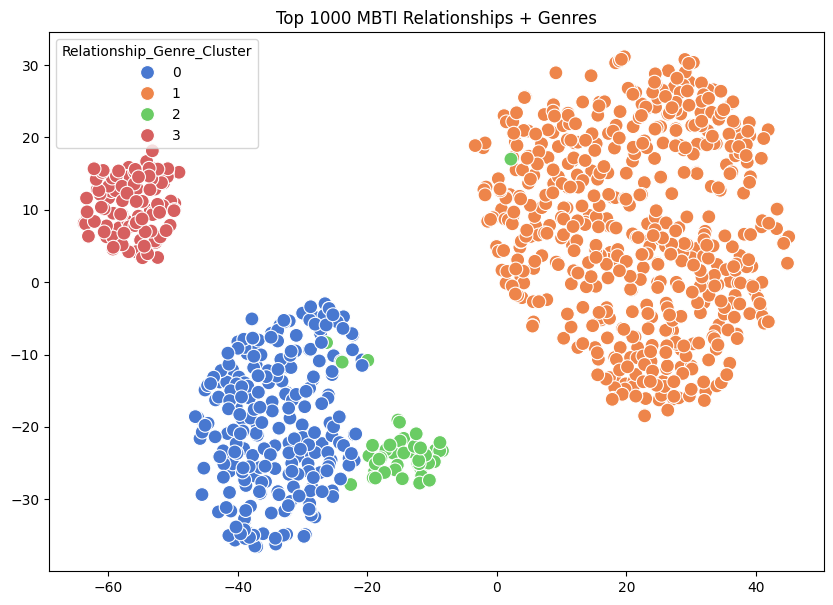

In [17]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_relationship_clusters)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Relationship_Genre_Cluster'], palette="muted", s=100)
plt.title('Top 1000 MBTI Relationships + Genres')
plt.show()

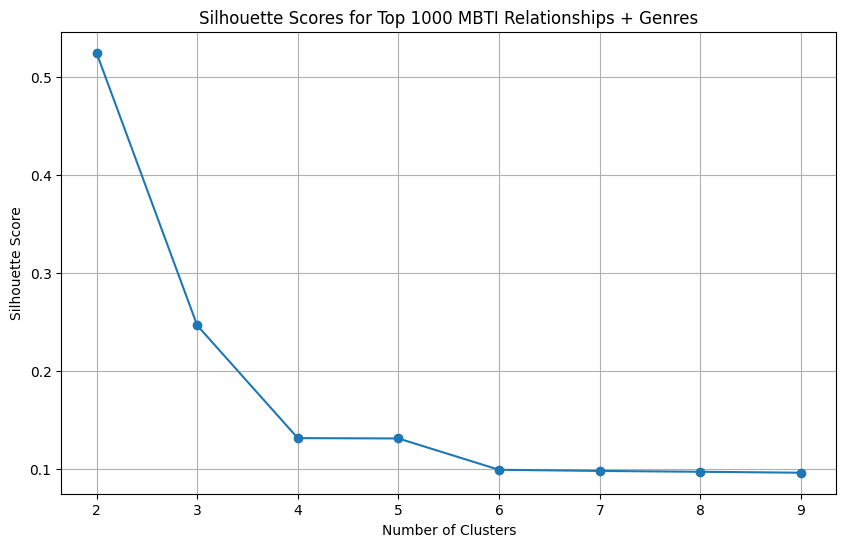

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores_relationship_genres = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_relationship_clusters)
    silhouette_scores_relationship_genres.append(silhouette_score(X_relationship_clusters, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores_relationship_genres, marker='o')
plt.title('Silhouette Scores for Top 1000 MBTI Relationships + Genres')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

In [55]:
file2 = pd.read_csv(f"/content/drive/MyDrive/COPY MBTI complete 4500 (1).csv")
df2 = pd.DataFrame(file2)

In [56]:
# One-hot encode MBTI types for both lead and second lead characters
mbti_encoded = pd.get_dummies(df2[['lead_MBTI', 'secondlead_MBTI']])

# One-hot encode genres
genres_encoded = df2['genres'].str.get_dummies(sep=',')

# Label encode 'relationship' column
label_encoder = LabelEncoder()
df2['relationship_encoded'] = label_encoder.fit_transform(df2['relationship'])

# Combine MBTI types, genres, and encoded relationship
X2_relationship_clusters = pd.concat([mbti_encoded, genres_encoded, df2[['relationship_encoded']]], axis=1)

# Apply clustering (using KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)
relationship_clusters = kmeans.fit_predict(X2_relationship_clusters)

# Add cluster labels to the dataset
df2['Relationship_Genre_Cluster'] = relationship_clusters



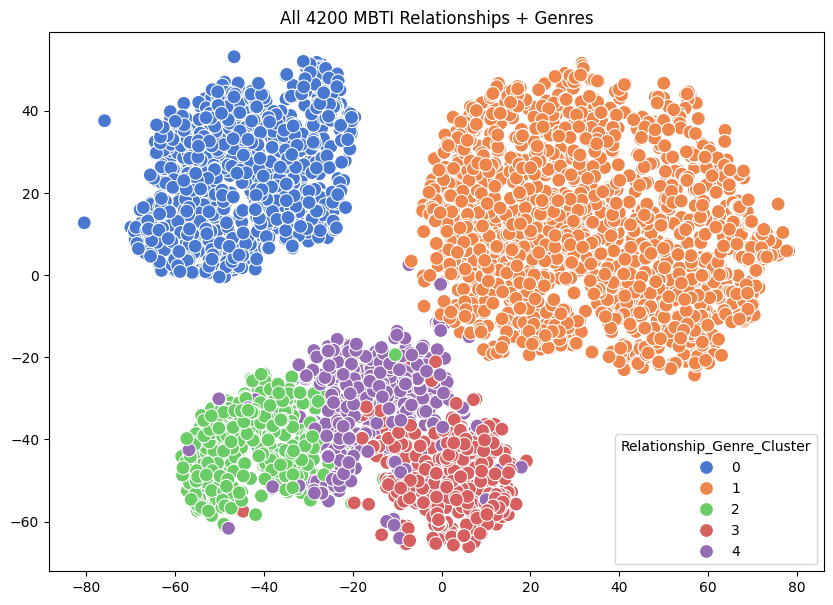

In [57]:
tsne = TSNE(n_components=2, random_state=42)
X2_tsne = tsne.fit_transform(X2_relationship_clusters)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X2_tsne[:, 0], y=X2_tsne[:, 1], hue=df2['Relationship_Genre_Cluster'], palette="muted", s=100)
plt.title('All 4200 MBTI Relationships + Genres')
plt.show()

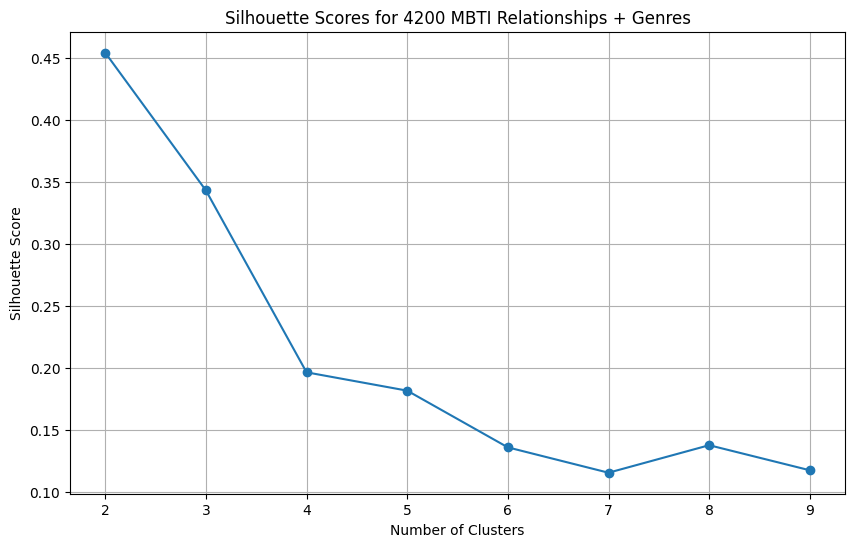

In [58]:
from sklearn.metrics import silhouette_score
silhouette_scores_relationship_genres = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X2_relationship_clusters)
    silhouette_scores_relationship_genres.append(silhouette_score(X2_relationship_clusters, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores_relationship_genres, marker='o')
plt.title('Silhouette Scores for 4200 MBTI Relationships + Genres')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

::Although it does not create the perfect elbow, it shows that as the number of clusters increase, the silhouette score goes down.

In [59]:
# One-hot encode genres
genres_encoded = df['genres'].str.get_dummies(sep=',')

# One-hot encode lead MBTI
lead_mbti_encoded = pd.get_dummies(df['lead_MBTI'], prefix='lead_MBTI')

# Combining MBTI types and genres
X_lead_mbti_clusters = pd.concat([lead_mbti_encoded, genres_encoded], axis=1)

# Applying clustering
kmeans = KMeans(n_clusters=4, random_state=42)
lead_mbti_clusters = kmeans.fit_predict(X_lead_mbti_clusters)

# Adding cluster labels to dataset
df['Lead_MBti_Genre_Cluster'] = lead_mbti_clusters


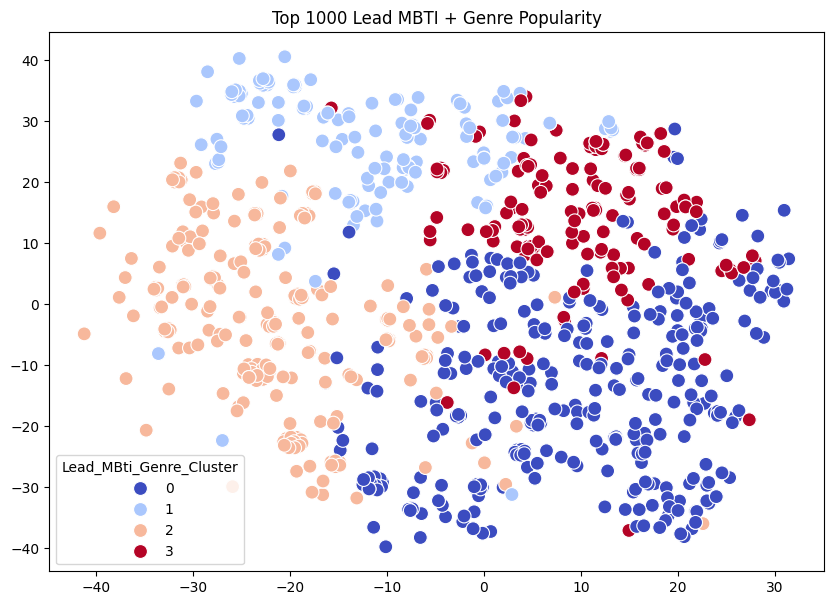

In [60]:
X_tsne = tsne.fit_transform(X_lead_mbti_clusters)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Lead_MBti_Genre_Cluster'], palette="coolwarm", s=100)
plt.title('Top 1000 Lead MBTI + Genre Popularity')
plt.show()

In [61]:
# One-hot encode genres
genres_encoded = df2['genres'].str.get_dummies(sep=',')

# One-hot encode lead MBTI
lead_mbti_encoded = pd.get_dummies(df2['lead_MBTI'], prefix='lead_MBTI')

# Combining MBTI types and genres
X2_lead_mbti_clusters = pd.concat([lead_mbti_encoded, genres_encoded], axis=1)

# Applying clustering
kmeans = KMeans(n_clusters=4, random_state=42)
lead_mbti_clusters = kmeans.fit_predict(X2_lead_mbti_clusters)

# Adding cluster labels to dataset
df2['Lead_MBti_Genre_Cluster'] = lead_mbti_clusters


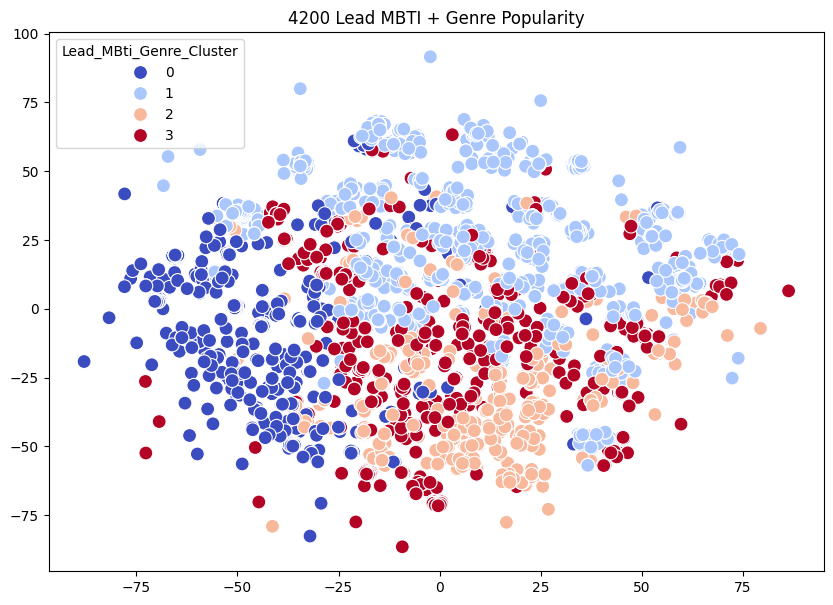

In [62]:
X2_tsne = tsne.fit_transform(X2_lead_mbti_clusters)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X2_tsne[:, 0], y=X2_tsne[:, 1], hue=df2['Lead_MBti_Genre_Cluster'], palette="coolwarm", s=100)
plt.title('4200 Lead MBTI + Genre Popularity')
plt.show()

In [63]:
# One-hot encode genres
genres_encoded = df['genres'].str.get_dummies(sep=',')

# One-hot encode lead MBTI
second_lead_mbti_encoded = pd.get_dummies(df['secondlead_MBTI'], prefix='secondlead_MBTI')

# Combining MBTI types and genres
X_second_lead_mbti_clusters = pd.concat([second_lead_mbti_encoded, genres_encoded], axis=1)

# Applying clustering
kmeans = KMeans(n_clusters=4, random_state=42)
second_lead_mbti_clusters = kmeans.fit_predict(X_second_lead_mbti_clusters)

# Adding cluster labels to dataset
df['Second_Lead_MBti_Genre_Cluster'] = second_lead_mbti_clusters


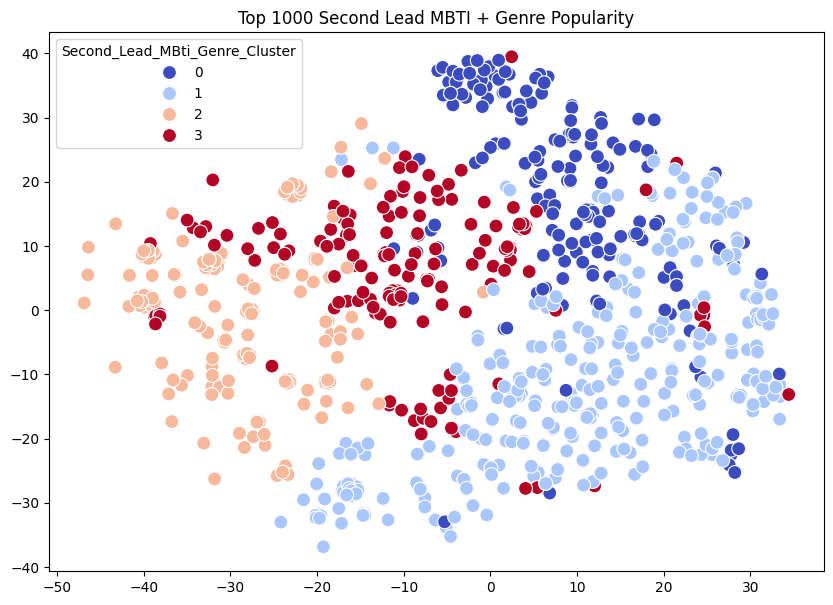

In [64]:
X_tsne = tsne.fit_transform(X_second_lead_mbti_clusters)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Second_Lead_MBti_Genre_Cluster'], palette="coolwarm", s=100)
plt.title('Top 1000 Second Lead MBTI + Genre Popularity')
plt.show()

In [65]:
# One-hot encode genres
genres_encoded = df2['genres'].str.get_dummies(sep=',')

# One-hot encode lead MBTI
second_lead_mbti_encoded = pd.get_dummies(df2['secondlead_MBTI'], prefix='secondlead_MBTI')

# Combining MBTI types and genres
X2_second_lead_mbti_clusters = pd.concat([second_lead_mbti_encoded, genres_encoded], axis=1)

# Applying clustering
kmeans = KMeans(n_clusters=4, random_state=42)
second_lead_mbti_clusters = kmeans.fit_predict(X2_second_lead_mbti_clusters)

# Adding cluster labels to dataset
df2['Second_Lead_MBti_Genre_Cluster'] = second_lead_mbti_clusters


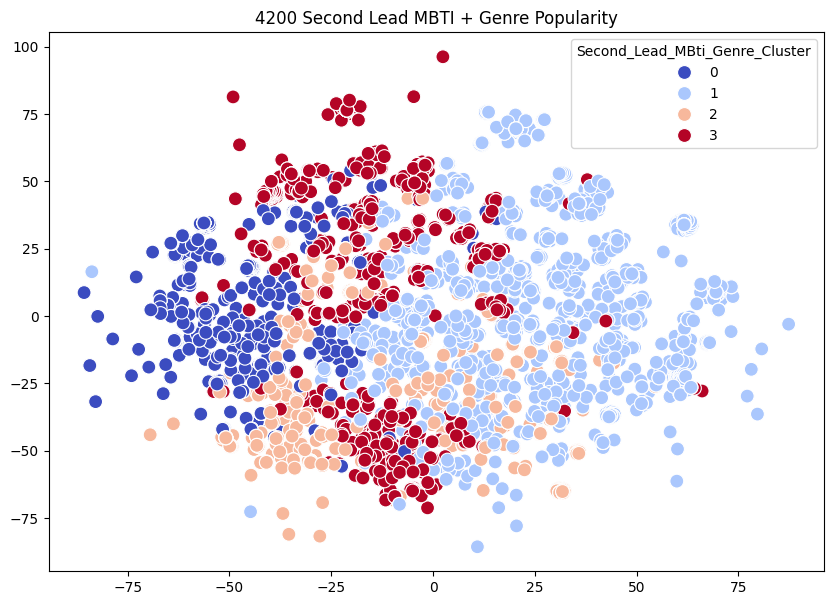

In [66]:
X2_tsne = tsne.fit_transform(X2_second_lead_mbti_clusters)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X2_tsne[:, 0], y=X2_tsne[:, 1], hue=df2['Second_Lead_MBti_Genre_Cluster'], palette="coolwarm", s=100)
plt.title('4200 Second Lead MBTI + Genre Popularity')
plt.show()